In [1]:
!pip install sentence-transformers

In [2]:
!pip install pyarrow
from sentence_transformers import SentenceTransformer, util
import numpy as np

# Load a pre-trained model
model = SentenceTransformer('all-MiniLM-L6-v2')

# Sentence Encoding : 

In [3]:
sentences = ["The weather today is sunny and warm.",
             "It’s a beautiful, sunny day outside.",
             "The stock market saw a significant drop yesterday.",
             "Shares declined sharply in response to economic news."]

embeddings = model.encode(sentences)
print("Embeddings shape:", embeddings.shape)

Embeddings shape: (4, 384)


In [4]:
embeddings

array([[-0.00279295,  0.10934518,  0.1128494 , ..., -0.02307624,
        -0.11978374,  0.07373539],
       [ 0.00267108,  0.08586301,  0.12191409, ...,  0.03122294,
        -0.04714967, -0.01280253],
       [ 0.05105703, -0.01858519,  0.06232902, ..., -0.12505037,
        -0.05777414,  0.09002294],
       [ 0.07942659,  0.03023688,  0.05516373, ..., -0.04657432,
        -0.1050997 ,  0.04368046]], dtype=float32)

# Calculate Cosine Similarity :

In [5]:
# Similar sentences
similarity1 = util.pytorch_cos_sim(embeddings[0], embeddings[1])
# Another pair of similar sentences
similarity2 = util.pytorch_cos_sim(embeddings[2], embeddings[3])
# Dissimilar sentences
similarity3 = util.pytorch_cos_sim(embeddings[0], embeddings[2])

print(f"Similarity between weather sentences: {similarity1.item()}")
print(f"Similarity between stock market sentences: {similarity2.item()}")
print(f"Similarity between weather and stock sentences: {similarity3.item()}")


Similarity between weather sentences: 0.7917705774307251
Similarity between stock market sentences: 0.5877910852432251
Similarity between weather and stock sentences: 0.11899664998054504


# Finding Top-K Most Similar Sentences :
Given a query sentence, find the top-K most similar sentences in a list-



In [6]:
query = "A sunny day outside"
# Encode query
query_embedding = model.encode(query)

# Compute cosine similarities
similarities = util.pytorch_cos_sim(query_embedding, embeddings)[0]

# Get top-k similar sentences
top_k = 2
indices = np.argsort(-similarities)[:top_k]

print("Top K most similar sentences:")
for idx in indices:
    print(f"{sentences[idx]} (Score: {similarities[idx].item()})")

# It’s a beautiful, sunny day outside. (Score: 0.8627687692642212)
# The weather today is sunny and warm. (Score: 0.8399025201797485)

Top K most similar sentences:
It’s a beautiful, sunny day outside. (Score: 0.8627685308456421)
The weather today is sunny and warm. (Score: 0.8399026989936829)


# Semantic Search Engine:

In [7]:
# Load the Sentence Transformer model
from sentence_transformers import SentenceTransformer, util
import numpy as np
import pandas as pd

# Load a pre-trained model
model = SentenceTransformer('all-MiniLM-L6-v2')



df = pd.read_csv("webtext.csv")
df.dropna(inplace=True)
df  = df.sample(n=1500).reset_index(drop=True)
df.head()

corpus = df['text']

# Encode the corpus
corpus_embeddings = model.encode(corpus, convert_to_tensor=True)


def semantic_search(query):
    # Encode the query
    query_embedding = model.encode(query, convert_to_tensor=True)

    # Find the closest sentence
    hits = util.semantic_search(query_embedding, corpus_embeddings, top_k=1)
    return hits[0][0]  # return the top hit


while True:
    # Get user input for the search query
    query = input("Enter your search query (or type 'exit' to quit): ")
    if query.lower() == 'exit':
        break

    # Perform semantic search
    result = semantic_search(query)

    print("\n\n")
    print("Input Query :", query)
    print("\n")
    # Display the most relevant sentence
    print(f"Most relevant sentence: '{corpus[result['corpus_id']]}' (Score: {result['score']})")

Enter your search query (or type 'exit' to quit):  xbsfv





Input Query : xbsfv


Most relevant sentence: 'In frameset' (Score: 0.33477193117141724)


Enter your search query (or type 'exit' to quit):  exit


#### In the code you provided, semantic_search is a function from the sentence-transformers library (usually imported as util). This function performs a semantic search by finding sentences in a corpus that are most similar in meaning to a given query.



# How to Cluster and Label Text Data Using Sentence Transformer and AI | Using Sentence Clustering to Understand Text Data :


In [8]:
from sklearn.cluster import AgglomerativeClustering
from sentence_transformers import SentenceTransformer

# # Initialize the model
model = SentenceTransformer('all-MiniLM-L6-v2')
print(model.get_sentence_embedding_dimension())


384


In [9]:
# Define the corpus
corpus = [
    "Rain is expected tomorrow.",
    "Stock prices are fluctuating a lot.",
    "Today is sunny and warm.",
    "A sunny day with clear skies.",
    "The weather is nice and bright today.",
    "Heavy rain is predicted for the weekend.",
    "The stock market is experiencing volatility.",
    "Tomorrow will bring more sunshine.",
    "A beautiful day to go for a walk.",
    "It's getting cloudy, might rain soon.",
    "I love sunny days at the beach.",
    "The forecast indicates possible thunderstorms.",
    "Investors are worried about market trends.",
    "It feels great to be outside on such a lovely day.",
    "There might be a chance of rain later.",
    "Prices are rising due to market instability.",
    "A perfect day for a picnic in the park.",
    "Don't forget your umbrella, just in case.",
    "The sun is shining, and it's quite warm.",
    "There will be sunny spells throughout the day.",
    "It's a good day for outdoor activities."
]

# Encode the corpus
embeddings = model.encode(corpus, convert_to_tensor=True)

# Move embeddings to CPU and convert to NumPy array
embeddings_np = embeddings.cpu().numpy()

In [10]:
embeddings_np

array([[-0.0260672 , -0.00436912,  0.1448288 , ..., -0.04761434,
        -0.06893142,  0.05910517],
       [ 0.0674111 , -0.07933214,  0.08097952, ..., -0.16500422,
        -0.02614762,  0.04517481],
       [ 0.00411609,  0.10016754,  0.10564078, ..., -0.01996408,
        -0.10154204,  0.03622726],
       ...,
       [ 0.04073848,  0.06930182,  0.09536362, ...,  0.0025399 ,
        -0.1006165 ,  0.03612087],
       [-0.01061354,  0.04267792,  0.08422717, ..., -0.03273541,
        -0.06823535,  0.01269213],
       [ 0.00613733,  0.08773934,  0.13383232, ..., -0.01177459,
        -0.07894175,  0.02521428]], dtype=float32)

In [11]:

# Perform clustering based on sentence embeddings
clustering_model = AgglomerativeClustering(n_clusters=3)
clustering_labels = clustering_model.fit_predict(embeddings_np)

In [12]:
clustering_labels

array([2, 1, 0, 0, 0, 2, 1, 0, 0, 2, 0, 2, 1, 0, 2, 1, 0, 2, 0, 0, 0])

In [13]:
# Display clusters
clustered_sentences = {}
for sentence_id, cluster_id in enumerate(clustering_labels):
    if cluster_id not in clustered_sentences:
        clustered_sentences[cluster_id] = []
    clustered_sentences[cluster_id].append(corpus[sentence_id])

for cluster_id, sentence_list in clustered_sentences.items():
    print(f"Cluster {cluster_id}: {sentence_list}")

Cluster 2: ['Rain is expected tomorrow.', 'Heavy rain is predicted for the weekend.', "It's getting cloudy, might rain soon.", 'The forecast indicates possible thunderstorms.', 'There might be a chance of rain later.', "Don't forget your umbrella, just in case."]
Cluster 1: ['Stock prices are fluctuating a lot.', 'The stock market is experiencing volatility.', 'Investors are worried about market trends.', 'Prices are rising due to market instability.']
Cluster 0: ['Today is sunny and warm.', 'A sunny day with clear skies.', 'The weather is nice and bright today.', 'Tomorrow will bring more sunshine.', 'A beautiful day to go for a walk.', 'I love sunny days at the beach.', 'It feels great to be outside on such a lovely day.', 'A perfect day for a picnic in the park.', "The sun is shining, and it's quite warm.", 'There will be sunny spells throughout the day.', "It's a good day for outdoor activities."]


In [14]:
# Define cluster names based on observed themes
cluster_names = {
    0: "Sunny Weather",
    1: "Stock Market Volatility",
    2: "Rainy Weather Forecast"
}

In [15]:
# Display clusters with assigned names
for cluster_id, sentence_list in clustered_sentences.items():
    print(f"{cluster_names[cluster_id]} (Cluster {cluster_id}): {sentence_list}")

Rainy Weather Forecast (Cluster 2): ['Rain is expected tomorrow.', 'Heavy rain is predicted for the weekend.', "It's getting cloudy, might rain soon.", 'The forecast indicates possible thunderstorms.', 'There might be a chance of rain later.', "Don't forget your umbrella, just in case."]
Stock Market Volatility (Cluster 1): ['Stock prices are fluctuating a lot.', 'The stock market is experiencing volatility.', 'Investors are worried about market trends.', 'Prices are rising due to market instability.']
Sunny Weather (Cluster 0): ['Today is sunny and warm.', 'A sunny day with clear skies.', 'The weather is nice and bright today.', 'Tomorrow will bring more sunshine.', 'A beautiful day to go for a walk.', 'I love sunny days at the beach.', 'It feels great to be outside on such a lovely day.', 'A perfect day for a picnic in the park.', "The sun is shining, and it's quite warm.", 'There will be sunny spells throughout the day.', "It's a good day for outdoor activities."]


# Sentence Paraphrase Detection | Paraphrase Mining Using Sentence Transformer :

In [16]:
from sentence_transformers import SentenceTransformer

# # Initialize the model
model = SentenceTransformer('all-MiniLM-L6-v2')

from sentence_transformers import util

sentence1 = "The cat is on the mat."
sentence2 = "A cat is sitting on a mat."

embedding1 = model.encode(sentence1)
embedding2 = model.encode(sentence2)

similarity_score = util.pytorch_cos_sim(embedding1, embedding2)

print(f"Paraphrase similarity score: {similarity_score.item()}")

sentences = [
    "The cat sits outside",
    "A man is playing guitar",
    "I love pasta",
    "The new movie is awesome",
    "The cat plays in the garden",
    "A woman watches TV",
    "The new movie is so great",
    "Do you like pizza?",
    "She enjoys reading books",
    "He is walking his dog",
    "The weather is nice today",
    "Let's go to the beach",
    "I need a cup of coffee",
    "They are planning a trip",
    "She cooks delicious meals",
    "I am learning to play the piano",
    "He works at a tech company",
    "This book is very interesting",
    "The sun is shining brightly",
    "It's raining outside",
    "The children are playing soccer",
    "He is fixing the car",
    "She writes beautiful poetry",
    "The flowers are blooming",
    "I enjoy hiking in the mountains",
    "He is swimming in the pool",
    "We are watching a comedy show",
    "The dog is barking loudly",
    "She is painting a landscape",
    "He likes to play video games",
    "I am studying for my exams",
    "They are building a new house",
    "The coffee shop is busy",
    "He listens to classical music",
    "She is designing a website",
    "I bought a new laptop",
    "They are baking cookies",
    "The bird sings in the morning",
    "He loves going to concerts",
    "She practices yoga every day",
    "The phone is ringing",
    "I need to finish this project",
    "The restaurant has great food",
    "He collects rare coins",
    "She enjoys watching documentaries",
    "They are exploring the city",
    "The laptop is charging",
    "He is training for a marathon",
    "I meditate every morning",
    "The bakery sells fresh bread",
    "She is learning French"
]

from sentence_transformers.util import paraphrase_mining

paraphrases = paraphrase_mining(model, sentences)

paraphrases[0:20]




for paraphrase in paraphrases[0:20]:
    score, i, j = paraphrase
    print("{} \t\t\t\t\t {} \t\t\t Score: {:.4f}".format(sentences[i], sentences[j], score))

Paraphrase similarity score: 0.9122743606567383
The new movie is awesome 					 The new movie is so great 			 Score: 0.8939
The cat sits outside 					 The cat plays in the garden 			 Score: 0.6788
She enjoys reading books 					 She enjoys watching documentaries 			 Score: 0.6314
They are planning a trip 					 They are exploring the city 			 Score: 0.5844
He listens to classical music 					 He loves going to concerts 			 Score: 0.5794
I need a cup of coffee 					 The coffee shop is busy 			 Score: 0.5284
He likes to play video games 					 He loves going to concerts 			 Score: 0.5189
I bought a new laptop 					 The laptop is charging 			 Score: 0.5188
I love pasta 					 Do you like pizza? 			 Score: 0.5096
She enjoys reading books 					 She is learning French 			 Score: 0.5038
She cooks delicious meals 					 The restaurant has great food 			 Score: 0.5014
He likes to play video games 					 He listens to classical music 			 Score: 0.4832
I am learning to play the piano 					 I am studying 

# Image Search :

Using a slow image processor as `use_fast` is unset and a slow processor was saved with this model. `use_fast=True` will be the default behavior in v4.52, even if the model was saved with a slow processor. This will result in minor differences in outputs. You'll still be able to use a slow processor with `use_fast=False`.


Similarity Scores:
Description: 'Two dogs in the snow' | Similarity Score: 16.8689
Description: 'A cat on a table' | Similarity Score: 19.3613
Description: 'A picture of London at night' | Similarity Score: 17.3866
Description: 'A happy dog playing fetch' | Similarity Score: 19.8989
Description: 'A dog sleeping on a couch' | Similarity Score: 12.5956
Description: 'Two cats fighting in a garden' | Similarity Score: 26.8421

Best match for the image is: 'Two cats fighting in a garden' with a score of 26.8421


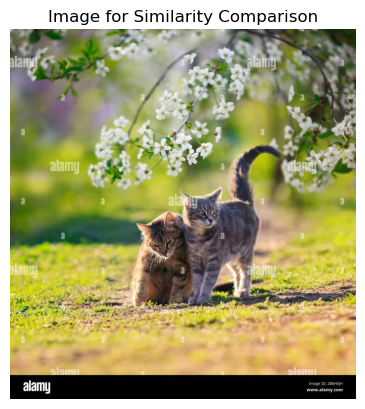

In [17]:
%matplotlib inline
import matplotlib.pyplot as plt

from sentence_transformers import SentenceTransformer
from PIL import Image

# Load CLIP model
model = SentenceTransformer("clip-ViT-B-32")

import matplotlib.pyplot as plt



def display_image_and_compare(image_path, text_descriptions):
    # Load the image
    img = Image.open(image_path)

    # Encode text descriptions
    text_emb = model.encode(text_descriptions)

    # Encode the image
    img_emb = model.encode(img)

    # Compute similarities
    similarity_scores = np.dot(text_emb, img_emb.T)  # Calculate similarity scores using dot product

    # Print results
    print("Similarity Scores:")
    for description, score in zip(text_descriptions, similarity_scores):
        print(f"Description: '{description}' | Similarity Score: {score:.4f}")

    # Find the best match
    best_match_index = np.argmax(similarity_scores)
    best_match_description = text_descriptions[best_match_index]
    print(f"\nBest match for the image is: '{best_match_description}' with a score of {similarity_scores[best_match_index]:.4f}")

    # Display the image
    plt.imshow(img)
    plt.axis('off')  # Hide the axis
    plt.title("Image for Similarity Comparison")
    plt.show()


# Example usage
image_path = "/Users/tanushree/Downloads/two-cats.jpg"  # Specify your image path
text_descriptions = [
    "Two dogs in the snow",
    "A cat on a table",
    "A picture of London at night",
    "A happy dog playing fetch",
    "A dog sleeping on a couch",
    "Two cats fighting in a garden"
]

# Call the function with the image path and text descriptions
display_image_and_compare(image_path, text_descriptions)

# Cross-Language Sentence Similarity with Sentence Transformers | Using Sentence Transformers for Multilingual Sentence Similarity :


In [18]:
from sentence_transformers import SentenceTransformer, util

# Load multilingual model
multi_model = SentenceTransformer('distiluse-base-multilingual-cased-v1')



In [19]:
# Define sentences in English, Urdu, and Hindi
sentences = [
    "Hello, how are you?",         # English
    "یہ ایک خوبصورت دن ہے۔",       # Urdu: "It's a beautiful day."
    "आप कैसे हैं?",                # Hindi: "How are you?"
]

# Encode the sentences
multi_embeddings = multi_model.encode(sentences)

multi_embeddings

array([[ 0.00612567,  0.03344807, -0.01331971, ...,  0.07394001,
        -0.02740127, -0.02660331],
       [ 0.01661286,  0.01465695,  0.00355343, ..., -0.02714997,
        -0.01421   ,  0.02969403],
       [ 0.00813477, -0.00191674, -0.03923362, ...,  0.00353285,
        -0.02637735, -0.02117414]], dtype=float32)

In [20]:
# Check similarity across languages
# Similarity between English and Urdu
similarity_english_urdu = util.pytorch_cos_sim(multi_embeddings[0], multi_embeddings[1])
print(f"Similarity between English and Urdu: {similarity_english_urdu.item()}")

# Similarity between English and Hindi
similarity_english_hindi = util.pytorch_cos_sim(multi_embeddings[0], multi_embeddings[2])
print(f"Similarity between English and Hindi: {similarity_english_hindi.item()}")

# Similarity between Urdu and Hindi
similarity_urdu_hindi = util.pytorch_cos_sim(multi_embeddings[1], multi_embeddings[2])
print(f"Similarity between Urdu and Hindi: {similarity_urdu_hindi.item()}")

Similarity between English and Urdu: -0.01213376596570015
Similarity between English and Hindi: 0.3384191393852234
Similarity between Urdu and Hindi: 0.20560583472251892


# Building an Intelligent FAQ Chatbot with Semantic Search in Python | How to Create a Question-Answer Chatbot with Machine Learning :

In [21]:
import pandas as pd
from sentence_transformers import SentenceTransformer, util

# Load the pre-trained model
model = SentenceTransformer('distiluse-base-multilingual-cased-v1')

In [22]:
# Create a sample FAQ DataFrame
faq_data = {
    "question": [
        "What is machine learning?", "How does AI work?", "What is the weather today?", "How to invest in stocks?", 
        "What is Python used for?", "What is data science?", "How to stay healthy?", "What is blockchain?",
        "What causes global warming?", "How can I start exercising?", "What is cloud computing?", 
        "What are the benefits of yoga?", "How to save for retirement?", "What is quantum computing?", 
        "How to reduce stress?", "What is cryptocurrency?", "How to improve mental health?", 
        "What is the capital of France?", "How to lose weight?", "What is 5G?", "What are renewable energies?", 
        "How to learn coding?", "What is a balanced diet?", "What is virtual reality?", "How does meditation help?", 
        "How to plan a budget?", "What is cybersecurity?", "How to build muscle?", "What is a recession?", 
        "How to improve focus?", "What is the stock market?", "How to make friends?", "What is inflation?", 
        "What is renewable energy?", "What is an algorithm?", "What is deep learning?", "What is a pandemic?", 
        "What is a balanced diet?", "How to handle failure?", "What is electric vehicle?", "How to sleep better?", 
        "What is sustainable development?", "What is an API?", "What is genetic engineering?", 
        "How does the internet work?", "What is a greenhouse effect?", "How to write a resume?", 
        "What is virtual reality?", "How to start a business?", "What is a startup?"
    ],
    "answer": [
        "Machine learning is a field of AI that uses statistical techniques to give computers the ability to learn.",
        "AI works by using algorithms to process large amounts of data and make decisions based on patterns.",
        "Today's weather forecast is partly cloudy with a high of 22°C.",
        "Investing in stocks involves buying shares of companies and holding them for potential growth.",
        "Python is used for web development, data analysis, automation, and more.",
        "Data science is the study of data to extract insights and knowledge.",
        "Staying healthy involves a balanced diet, regular exercise, and good mental health.",
        "Blockchain is a decentralized ledger technology used for secure transactions.",
        "Global warming is caused by greenhouse gases and human activity.",
        "Start exercising with a mix of cardio, strength, and flexibility training.",
        "Cloud computing is the delivery of computing services over the internet.",
        "Yoga improves flexibility, reduces stress, and enhances physical fitness.",
        "Save for retirement by setting aside a portion of income into a savings account.",
        "Quantum computing is a type of computing based on quantum mechanics.",
        "Reducing stress can involve mindfulness, exercise, and adequate rest.",
        "Cryptocurrency is digital currency using cryptography for security.",
        "Mental health can be improved through therapy, exercise, and social support.",
        "The capital of France is Paris.",
        "Weight loss requires a calorie deficit through diet and exercise.",
        "5G is the fifth generation of wireless technology.",
        "Renewable energies include solar, wind, and hydropower.",
        "Learn coding through online courses, practice, and building projects.",
        "A balanced diet includes a variety of nutrients from all food groups.",
        "Virtual reality is a simulated experience that can be similar to the real world.",
        "Meditation helps by reducing stress and improving focus.",
        "Plan a budget by listing income, expenses, and setting spending limits.",
        "Cybersecurity is the practice of protecting systems from digital attacks.",
        "Building muscle requires strength training and protein intake.",
        "A recession is a period of economic decline across the market.",
        "Improve focus with mindful practices and setting clear goals.",
        "The stock market is a platform for buying and selling stocks.",
        "Making friends involves engaging in social activities and being open.",
        "Inflation is the rate at which prices increase over time.",
        "Renewable energy comes from natural resources like sunlight and wind.",
        "An algorithm is a set of rules to solve problems.",
        "Deep learning is a subset of machine learning using neural networks.",
        "A pandemic is a global outbreak of a disease.",
        "A balanced diet includes fruits, vegetables, protein, and whole grains.",
        "Handle failure by learning from mistakes and staying motivated.",
        "Electric vehicles are powered by electric motors instead of fuel engines.",
        "Better sleep can be achieved by maintaining a sleep schedule and a calm environment.",
        "Sustainable development meets needs without harming future generations.",
        "An API is a set of functions that allows applications to access data.",
        "Genetic engineering is modifying genes to achieve desired traits.",
        "The internet works by transferring data across a network of computers.",
        "The greenhouse effect is warming due to trapped atmospheric gases.",
        "Write a resume by highlighting skills, experience, and accomplishments.",
        "Virtual reality provides immersive experiences in simulated environments.",
        "Starting a business involves planning, market research, and funding.",
        "A startup is a company focused on innovative products and growth potential."
    ]
}

In [23]:
# Create DataFrame
faq_df = pd.DataFrame(faq_data)
# Encode FAQ questions
faq_embeddings = model.encode(faq_df['question'].tolist())

In [24]:
def dynamic_faq_system():
    print("Chatbot: Hello! Ask a question or type 'exit' to quit.")
    
    while True:
        user_query = input("You: ")
        if user_query.lower() in ["exit", "quit"]:
            print("Chatbot: Goodbye!")
            break

        # Encode user query
        query_embedding = model.encode(user_query)

        # Find the closest FAQ question
        closest = util.semantic_search(query_embedding, faq_embeddings, top_k=1)
        best_match_id = closest[0][0]['corpus_id']
        best_answer = faq_df.iloc[best_match_id]['answer']

        # Display answer
        print(f"Chatbot: {best_answer}")

# Run the FAQ chatbot
dynamic_faq_system()

Chatbot: Hello! Ask a question or type 'exit' to quit.


You:  capital of france


Chatbot: The capital of France is Paris.


You:  exit


Chatbot: Goodbye!


# Detecting Outlier Sentences Using Sentence Transformers and Cosine Similarity :

In [25]:
from sentence_transformers import SentenceTransformer, util

# Load the pre-trained model
model = SentenceTransformer('distiluse-base-multilingual-cased-v1')


corpus = ["The stock market saw a big drop.", 
          "Shares declined sharply due to economic news.",
          "Money gets Money in stock",
          "It may rain today"]

corpus_embeddings = model.encode(corpus)

# Compute pairwise cosine similarities
cosine_sim_matrix = util.pytorch_cos_sim(corpus_embeddings, corpus_embeddings)

cosine_sim_matrix

avg_sim = cosine_sim_matrix.mean(dim=1)
avg_sim

# Identify the most "outlier" sentence
outlier_index = avg_sim.argmin().item()
outlier_index

print(f"Outlier sentence: {corpus[outlier_index]} (Avg similarity: {avg_sim[outlier_index].item()})")

Outlier sentence: It may rain today (Avg similarity: 0.32881420850753784)


# Extract Top Keywords with Sentence Transformers :


In [26]:
import numpy as np
import torch
from sentence_transformers import SentenceTransformer, util

# Load pretrained embedding model
model = SentenceTransformer('all-MiniLM-L6-v2')

# Expanded Keywords
keywords = [
    "artificial intelligence", "machine learning", "blockchain", "cybersecurity",
    "software engineering", "football", "basketball", "Olympics", "athletics",
    "fitness", "election", "policy", "diplomacy", "legislation", "foreign relations",
    "biology", "physics", "chemistry", "genetics", "astronomy", "healthcare",
    "finance", "economics", "environment", "entertainment", "education", "psychology"
]

# Precompute keyword embeddings for efficient similarity calculation
keyword_embeddings = model.encode(keywords)

# Function to extract top N matching keywords
def extract_top_keywords(content, keywords, keyword_embeddings, top_n=3):
    # Encode the content
    content_embedding = model.encode(content)

    # Compute cosine similarities
    similarities = util.cos_sim(content_embedding, keyword_embeddings).flatten()

    # Get indices of top N similarities
    top_indices = torch.topk(similarities, top_n).indices

    # Retrieve top N keywords based on the indices
    top_keywords = [keywords[i] for i in top_indices]

    return top_keywords

# Extract top keywords for each content sample
while True:
  content = input("Input Text To Get Keywords or press (exist)   :")
  print("\n")

  if content == "exit":
    break
  else:
    top_keywords = extract_top_keywords(content, keywords, keyword_embeddings, top_n=3)  # Use top_n=5 for top 5 keywords
    print(f"Content: {content}")
    print(f"Top Tags: {top_keywords}\n")

Input Text To Get Keywords or press (exist)   : econmics




Content: econmics
Top Tags: ['economics', 'finance', 'environment']



Input Text To Get Keywords or press (exist)   : exit


# Fine Tuning Sentence Transformer Pretrained Model on custom dataset :


In [4]:
import pandas as pd 
from sentence_transformers import SentenceTransformer , InputExample, losses
from torch.utils.data import DataLoader

# Create a small dataset 

# convert to DataFrame 

df = pd.read_csv("/Users/tanushree/Downloads/squad/SQuAD-v1.1.csv")
df


,title,context,question,answer,answer_start,answer_end
0,University_of_Notre_Dame,"Architecturally, the school has a Catholic cha...",To whom did the Virgin Mary allegedly appear i...,Saint Bernadette Soubirous,515,541
1,University_of_Notre_Dame,"Architecturally, the school has a Catholic cha...",What is in front of the Notre Dame Main Building?,a copper statue of Christ,188,213
2,University_of_Notre_Dame,"Architecturally, the school has a Catholic cha...",The Basilica of the Sacred heart at Notre Dame...,the Main Building,279,296
3,University_of_Notre_Dame,"Architecturally, the school has a Catholic cha...",What is the Grotto at Notre Dame?,a Marian place of prayer and reflection,381,420
4,University_of_Notre_Dame,"Architecturally, the school has a Catholic cha...",What sits on top of the Main Building at Notre...,a golden statue of the Virgin Mary,92,126
...,...,...,...,...,...,...
87594,Kathmandu,"Kathmandu Metropolitan City (KMC), in order to...",In what US state did Kathmandu first establish...,Oregon,229,235
87595,Kathmandu,"Kathmandu Metropolitan City (KMC), in order to...",What was Yangon previously known as?,Rangoon,414,421
87596,Kathmandu,"Kathmandu Metropolitan City (KMC), in order to...",With what Belorussian city does Kathmandu have...,Minsk,476,481
87597,Kathmandu,"Kathmandu Metropolitan City (KMC), in order to...",In what year did Kathmandu create its initial ...,1975,199,203


## Prepare Data for Fine-Tuning

**texts**: A list of two strings: the question and its corresponding context.

**Example**:  
["what is AI?", "AI is the simulation of human intelligence by machines."]

**label**: A float value representing the similarity between the two texts.

Here, **1.0** indicates that the question and context are highly semantically related.


In [6]:
from sentence_transformers import InputExample
df.dropna(inplace=True)
df = df.sample(n=1000)
# Convert to InputExample format
train_examples = [
    InputExample(texts=(row['question'], row['context']), label=1.0) for _, row in df.iterrows() 
]

In [7]:
# Printing the first 5 example from tarin_example
for example in train_examples[:5]:
    print(f"Question: {example.texts[0]}")
    print(f"Context: {example.texts[1]}")
    print(f"Lable: {example.label}")
    print("-----")
    

Question: Who compared transnational police information and intelligence sharing practices?
Context: Studies of this kind outside of Europe are even rarer, so it is difficult to make generalizations, but one small-scale study that compared transnational police information and intelligence sharing practices at specific cross-border locations in North America and Europe confirmed that low visibility of police information and intelligence sharing was a common feature (Alain, 2001). Intelligence-led policing is now common practice in most advanced countries (Ratcliffe, 2007) and it is likely that police intelligence sharing and information exchange has a common morphology around the world (Ratcliffe, 2007). James Sheptycki has analyzed the effects of the new information technologies on the organization of policing-intelligence and suggests that a number of 'organizational pathologies' have arisen that make the functioning of security-intelligence processes in transnational policing deeply 

In [30]:
%pip install --upgrade pip setuptools wheel



huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Note: you may need to restart the kernel to use updated packages.


In [31]:
%pip install --upgrade pip
%pip install pyarrow datasets sentence-transformers pandas



huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Note: you may need to restart the kernel to use updated packages.


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Note: you may need to restart the kernel to use updated packages.


In [32]:
import sys
print(sys.executable)


/opt/anaconda3/bin/python


In [33]:
%pip uninstall -y pyarrow


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Found existing installation: pyarrow 22.0.0
Uninstalling pyarrow-22.0.0:
  Successfully uninstalled pyarrow-22.0.0
Note: you may need to restart the kernel to use updated packages.


In [34]:
%pip cache purge


Files removed: 12 (34.6 MB)


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Note: you may need to restart the kernel to use updated packages.


In [35]:
import pyarrow
print(pyarrow.__version__)


22.0.0


In [20]:
import os
os.environ["PYTORCH_MPS_HIGH_WATERMARK_RATIO"] = "0.0"

import torch
from sentence_transformers import SentenceTransformer, losses, InputExample
from torch.utils.data import DataLoader

# Disable MPS and force CPU usage
torch.backends.mps.is_available = lambda: False

# Create training examples
train_examples = [
    InputExample(texts=['This is a positive sentence', 'This is another positive sentence'], label=1.0),
    InputExample(texts=['This is a negative sentence', 'This is a positive sentence'], label=0.0),
    InputExample(texts=['Sample text one', 'Sample text two'], label=0.5),
]

# Load model directly on CPU
model = SentenceTransformer('sentence-transformers/all-MiniLM-L6-v2', device='cpu')

# Verify model is on CPU
print(f"Model device: {model.device}")

# DataLoader with batch size 1
train_dataloader = DataLoader(train_examples, shuffle=True, batch_size=2)

# Define loss
train_loss = losses.CosineSimilarityLoss(model)

# Train with reduced epochs for testing
model.fit(
    train_objectives=[(train_dataloader, train_loss)],
    epochs=3,  # Start with 1 epoch to test
    warmup_steps=10,
    show_progress_bar=True
)

print("✅ Training completed successfully on CPU!")
model.save('./fine_tuned_model')


Model device: cpu


Computing widget examples:   0%|          | 0/1 [00:00<?, ?example/s]

/opt/anaconda3/lib/python3.13/site-packages/torch/utils/data/dataloader.py:692: UserWarning: 'pin_memory' argument is set as true but not supported on MPS now, device pinned memory won't be used.
  warnings.warn(warn_msg)


Step,Training Loss


✅ Training completed successfully on CPU!


## Save and Load the Fine-Tuned Model ~

In [23]:
# Save the Model 
model.save("fine_tuned_sentence_transformer_qa")
# Load the fine-tuned model
fine_tuned_model = SentenceTransformer("fine_tuned_sentence_transformer_qa")

In [24]:
from sentence_transformers import util
import numpy as np

def calculate_em_and_f1(model, df):
    """
    Calculate Exact Match (EM) and F1-Score for QA tasks.

    Args:
        model: Fine-tuned SentenceTransformer model.
        df: DataFrame with 'question', 'answer', and 'context'.

    Returns:
        em_score: Exact Match percentage.
        f1_avg: Average F1 score.
    """
    # Precompute context embeddings
    context_embeddings = model.encode(df['context'].tolist(), convert_to_tensor=True)

    em_count = 0
    f1_scores = []

    for idx, row in df.iterrows():
        question = row['question']
        true_answer = row['answer']

        # Encode the question
        question_embedding = model.encode(question, convert_to_tensor=True)

        # Compute cosine similarities
        similarities = util.pytorch_cos_sim(question_embedding, context_embeddings).flatten()
        best_match_idx = int(similarities.argmax().item())  # Convert to integer

        # Get the predicted answer
        predicted_answer = df.iloc[best_match_idx]['answer']

        # Exact Match (EM)
        if predicted_answer.strip().lower() == true_answer.strip().lower():
            em_count += 1

        # F1-Score
        predicted_tokens = set(predicted_answer.split())
        true_tokens = set(true_answer.split())
        common_tokens = predicted_tokens.intersection(true_tokens)

        if common_tokens:
            precision = len(common_tokens) / len(predicted_tokens)
            recall = len(common_tokens) / len(true_tokens)
            f1 = 2 * (precision * recall) / (precision + recall)
        else:
            f1 = 0.0

        f1_scores.append(f1)

    # Calculate metrics
    em_score = (em_count / len(df)) * 100
    f1_avg = np.mean(f1_scores)

    return em_score, f1_avg

# Evaluate the model
em_score, f1_avg = calculate_em_and_f1(fine_tuned_model, df)

print(f"Exact Match (EM): {em_score:.2f}%")
print(f"Average F1-Score: {f1_avg:.2f}")

Exact Match (EM): 85.30%
Average F1-Score: 0.85
